<a href="https://colab.research.google.com/github/theaayushraman/JOSAA-Analysis/blob/main/JOSAA%20main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

from io import BytesIO


In [3]:
u5='https://raw.githubusercontent.com/theaayushraman/JOSAA-Analysis/main/2023_Round_5.csv'
u4='https://raw.githubusercontent.com/theaayushraman/JOSAA-Analysis/main/2023_Round_4.csv'
u3='https://raw.githubusercontent.com/theaayushraman/JOSAA-Analysis/main/2023_Round_3.csv'
u2='https://raw.githubusercontent.com/theaayushraman/JOSAA-Analysis/main/2023_Round_2.csv'
u1='https://raw.githubusercontent.com/theaayushraman/JOSAA-Analysis/main/2023_Round_1.csv'
u6='https://raw.githubusercontent.com/theaayushraman/JOSAA-Analysis/main/2023_Round_6.csv'
d1 = pd.read_csv(u1)
d2 = pd.read_csv(u2)
d3 = pd.read_csv(u3)
d4 = pd.read_csv(u4)
d5 = pd.read_csv(u5)
d6 = pd.read_csv(u6)


In [4]:
new_columns = {
    'Unnamed: 0': 'Institute',
    'Unnamed: 1': 'Academic Program Name',
    'Unnamed: 2': 'Quota',
    'Unnamed: 3': 'Seat Type',
    'Unnamed: 4': 'Gender',
    'Unnamed: 5': 'Opening Rank',
    'Unnamed: 6': 'Closing Rank'
}


d1.rename(columns=new_columns, inplace=True)
d2.rename(columns=new_columns, inplace=True)
d3.rename(columns=new_columns, inplace=True)
d4.rename(columns=new_columns, inplace=True)
d5.rename(columns=new_columns, inplace=True)
d6.rename(columns=new_columns, inplace=True)

In [5]:
dfs = [d1, d2, d3, d4, d5, d6]


for df in dfs:
    df.replace(to_replace=r'\n', value='', regex=True, inplace=True)


d1.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,9462,12911
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16218,19272
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,1852,1977
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3056,3056
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,4014,4642


In [6]:

key_columns = ['Institute', 'Academic Program Name', 'Quota', 'Seat Type', 'Gender']

new_df = d1[key_columns + ['Opening Rank', 'Closing Rank']].copy()

new_df.rename(columns={'Opening Rank': 'Opening Rank Round 1', 'Closing Rank': 'Closing Rank Round 1'}, inplace=True)

for i, df in enumerate([d2, d3, d4, d5, d6], start=2):

    closing_rank_df = df[key_columns + ['Closing Rank']].copy()

    closing_rank_df.rename(columns={'Closing Rank': f'Closing Rank Round {i}'}, inplace=True)

    new_df = pd.merge(new_df, closing_rank_df, on=key_columns, how='inner')

new_df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank Round 1,Closing Rank Round 1,Closing Rank Round 2,Closing Rank Round 3,Closing Rank Round 4,Closing Rank Round 5,Closing Rank Round 6
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,9462,12911,13754,13785,13785,13909,14997
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16218,19272,19479,19479,19479,19479,21229
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,1852,1977,2049,2049,2049,2049,2341
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3056,3056,3056,3056,3056,3056,3354
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,4014,4642,5208,5208,5208,5208,5274


In [7]:
print("Original DataFrames sizes:")
print(f"d1: {d1.shape}")
print(f"d2: {d2.shape}")
print(f"d3: {d3.shape}")
print(f"d4: {d4.shape}")
print(f"d5: {d5.shape}")
print(f"d6: {d6.shape}")

print("\nNew DataFrame size:")
print(f"new_df: {new_df.shape}")

Original DataFrames sizes:
d1: (10842, 7)
d2: (10474, 7)
d3: (10403, 7)
d4: (10391, 7)
d5: (10384, 7)
d6: (10365, 7)

New DataFrame size:
new_df: (10359, 12)


In [8]:
new_df['Institute'] = new_df['Institute'].str.replace('Institute  of', 'Institute of')
df=new_df
print(df.dtypes)

Institute                object
Academic Program Name    object
Quota                    object
Seat Type                object
Gender                   object
Opening Rank Round 1     object
Closing Rank Round 1     object
Closing Rank Round 2     object
Closing Rank Round 3     object
Closing Rank Round 4     object
Closing Rank Round 5     object
Closing Rank Round 6     object
dtype: object


In [9]:
rank_columns = ['Opening Rank Round 1', 'Closing Rank Round 1', 'Closing Rank Round 2',
                'Closing Rank Round 3', 'Closing Rank Round 4', 'Closing Rank Round 5',
                'Closing Rank Round 6']
mask = new_df[rank_columns].applymap(lambda x: x.isnumeric())
new_df = new_df[mask.all(axis=1)]
new_df.reset_index(drop=True, inplace=True)
for column in rank_columns:
    new_df[column] = new_df[column].astype(int)


print(new_df[rank_columns].dtypes)


Opening Rank Round 1    int64
Closing Rank Round 1    int64
Closing Rank Round 2    int64
Closing Rank Round 3    int64
Closing Rank Round 4    int64
Closing Rank Round 5    int64
Closing Rank Round 6    int64
dtype: object


<ipython-input-9-002a2f56c276>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = new_df[column].astype(int)
<ipython-input-9-002a2f56c276>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = new_df[column].astype(int)
<ipython-input-9-002a2f56c276>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [10]:
new_df.shape

(10229, 12)

In [11]:
#new_df.to_csv('new_df.csv', index=False)

#files.download('new_df.csv')

In [12]:
print(df['Institute'])

0            Indian Institute of Technology Bhubaneswar
1            Indian Institute of Technology Bhubaneswar
2            Indian Institute of Technology Bhubaneswar
3            Indian Institute of Technology Bhubaneswar
4            Indian Institute of Technology Bhubaneswar
                              ...                      
10354    Indian Institute of Handloom Technology, Salem
10355    Indian Institute of Handloom Technology, Salem
10356    Indian Institute of Handloom Technology, Salem
10357    Indian Institute of Handloom Technology, Salem
10358    Indian Institute of Handloom Technology, Salem
Name: Institute, Length: 10359, dtype: object


In [13]:
unique_institutes = df['Institute'].unique()

print("Unique Institutes:")
for institute in unique_institutes:
    print(institute)

Unique Institutes:
Indian Institute of Technology Bhubaneswar
Indian Institute of Technology Bombay
Indian Institute of Technology Mandi
Indian Institute of Technology Delhi
Indian Institute of Technology Indore
Indian Institute of Technology Kharagpur
Indian Institute of Technology Hyderabad
Indian Institute of Technology Jodhpur
Indian Institute of Technology Kanpur
Indian Institute of Technology Madras
Indian Institute of Technology Gandhinagar
Indian Institute of Technology Patna
Indian Institute of Technology Roorkee
Indian Institute of Technology (ISM) Dhanbad
Indian Institute of Technology Ropar
Indian Institute of Technology (BHU) Varanasi
Indian Institute of Technology Guwahati
Indian Institute of Technology Bhilai
Indian Institute of Technology Goa
Indian Institute of Technology Palakkad
Indian Institute of Technology Tirupati
Indian Institute of Technology Jammu
Indian Institute of Technology Dharwad
Dr. B R Ambedkar National Institute of Technology, Jalandhar
Malaviya Natio

In [14]:
df=new_df

In [15]:
iit_pattern = r'Indian\s+Institute\s+of\s+Technology'


iit_filter = df['Institute'].str.contains(iit_pattern)
iit_df = df[iit_filter]

unique_iit_list = iit_df['Institute'].unique()

print("Unique IITs after refining the filter:")
for iit in unique_iit_list:
    print(iit)



Unique IITs after refining the filter:
Indian Institute of Technology Bhubaneswar
Indian Institute of Technology Bombay
Indian Institute of Technology Mandi
Indian Institute of Technology Delhi
Indian Institute of Technology Indore
Indian Institute of Technology Kharagpur
Indian Institute of Technology Hyderabad
Indian Institute of Technology Jodhpur
Indian Institute of Technology Kanpur
Indian Institute of Technology Madras
Indian Institute of Technology Gandhinagar
Indian Institute of Technology Patna
Indian Institute of Technology Roorkee
Indian Institute of Technology (ISM) Dhanbad
Indian Institute of Technology Ropar
Indian Institute of Technology (BHU) Varanasi
Indian Institute of Technology Guwahati
Indian Institute of Technology Bhilai
Indian Institute of Technology Goa
Indian Institute of Technology Palakkad
Indian Institute of Technology Tirupati
Indian Institute of Technology Jammu
Indian Institute of Technology Dharwad


In [16]:
iit_df = df[iit_filter]

iit_df.head()

,Institute,Academic Program Name,Quota,Seat Type,Gender,Opening Rank Round 1,Closing Rank Round 1,Closing Rank Round 2,Closing Rank Round 3,Closing Rank Round 4,Closing Rank Round 5,Closing Rank Round 6
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Gender-Neutral,9462,12911,13754,13785,13785,13909,14997
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OPEN,Female-only (including Supernumerary),16218,19272,19479,19479,19479,19479,21229
2,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Gender-Neutral,1852,1977,2049,2049,2049,2049,2341
3,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,EWS,Female-only (including Supernumerary),3056,3056,3056,3056,3056,3056,3354
4,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",AI,OBC-NCL,Gender-Neutral,4014,4642,5208,5208,5208,5208,5274


In [17]:
iit_df.shape

(2900, 12)

In [18]:

unique_programs = iit_df['Academic Program Name'].unique()


print(unique_programs)

['Civil Engineering (4 Years, Bachelor of Technology)'
 'Civil Engineering and M. Tech. in Structural Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))'
 'Civil Engineering and M.Tech in Transportation Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))'
 'Civil Engineering and M.Tech. in Environmental Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))'
 'Computer Science and Engineering (4 Years, Bachelor of Technology)'
 'Computer Science and Engineering (5 Years, Bachelor and Master of Technology (Dual Degree))'
 'Electrical  Engineering and M.Tech Power Electronics and Drives (5 Years, Bachelor and Master of Technology (Dual Degree))'
 'Electrical Engineering (4 Years, Bachelor of Technology)'
 'Electronics and Communication Engineering (4 Years, Bachelor of Technology)'
 'Mechanical Engineering (4 Years, Bachelor of Technology)'
 'Mechanical Engineering and M. Tech. in Mechanical System Design (5 Years, Bachelor and Maste

In [19]:
rank_columns = ['Opening Rank Round 1', 'Closing Rank Round 1', 'Closing Rank Round 2',
                'Closing Rank Round 3', 'Closing Rank Round 4', 'Closing Rank Round 5',
                'Closing Rank Round 6']
print(iit_df[rank_columns].dtypes)

Opening Rank Round 1    int64
Closing Rank Round 1    int64
Closing Rank Round 2    int64
Closing Rank Round 3    int64
Closing Rank Round 4    int64
Closing Rank Round 5    int64
Closing Rank Round 6    int64
dtype: object


In [20]:
import matplotlib.pyplot as plt

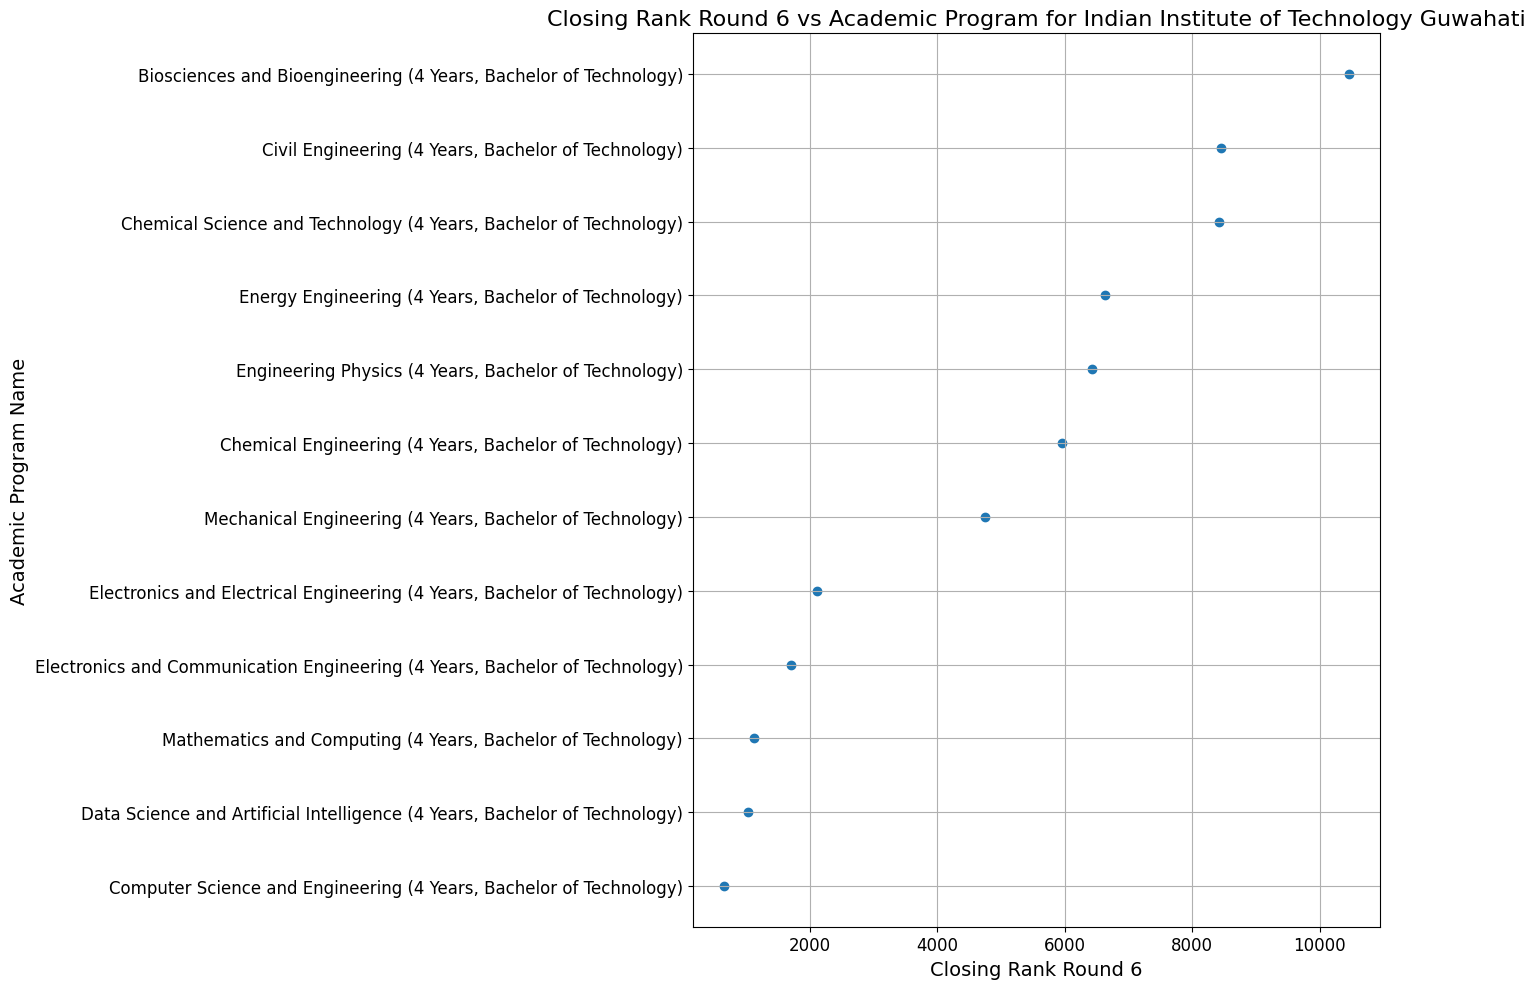

In [21]:


selected_iit = 'Indian Institute of Technology Guwahati'

filtered_df = iit_df[(iit_df['Institute'] == selected_iit) &
                     (iit_df['Gender'] == 'Gender-Neutral') &
                     (iit_df['Seat Type'] == 'OPEN')]

filtered_df_sorted = filtered_df.sort_values('Closing Rank Round 6')


plt.figure(figsize=(14, 10))
plt.scatter(filtered_df_sorted['Closing Rank Round 6'], filtered_df_sorted['Academic Program Name'])
plt.xlabel('Closing Rank Round 6', fontsize=14)
plt.ylabel('Academic Program Name', fontsize=14)
plt.title(f'Closing Rank Round 6 vs Academic Program for {selected_iit}', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()


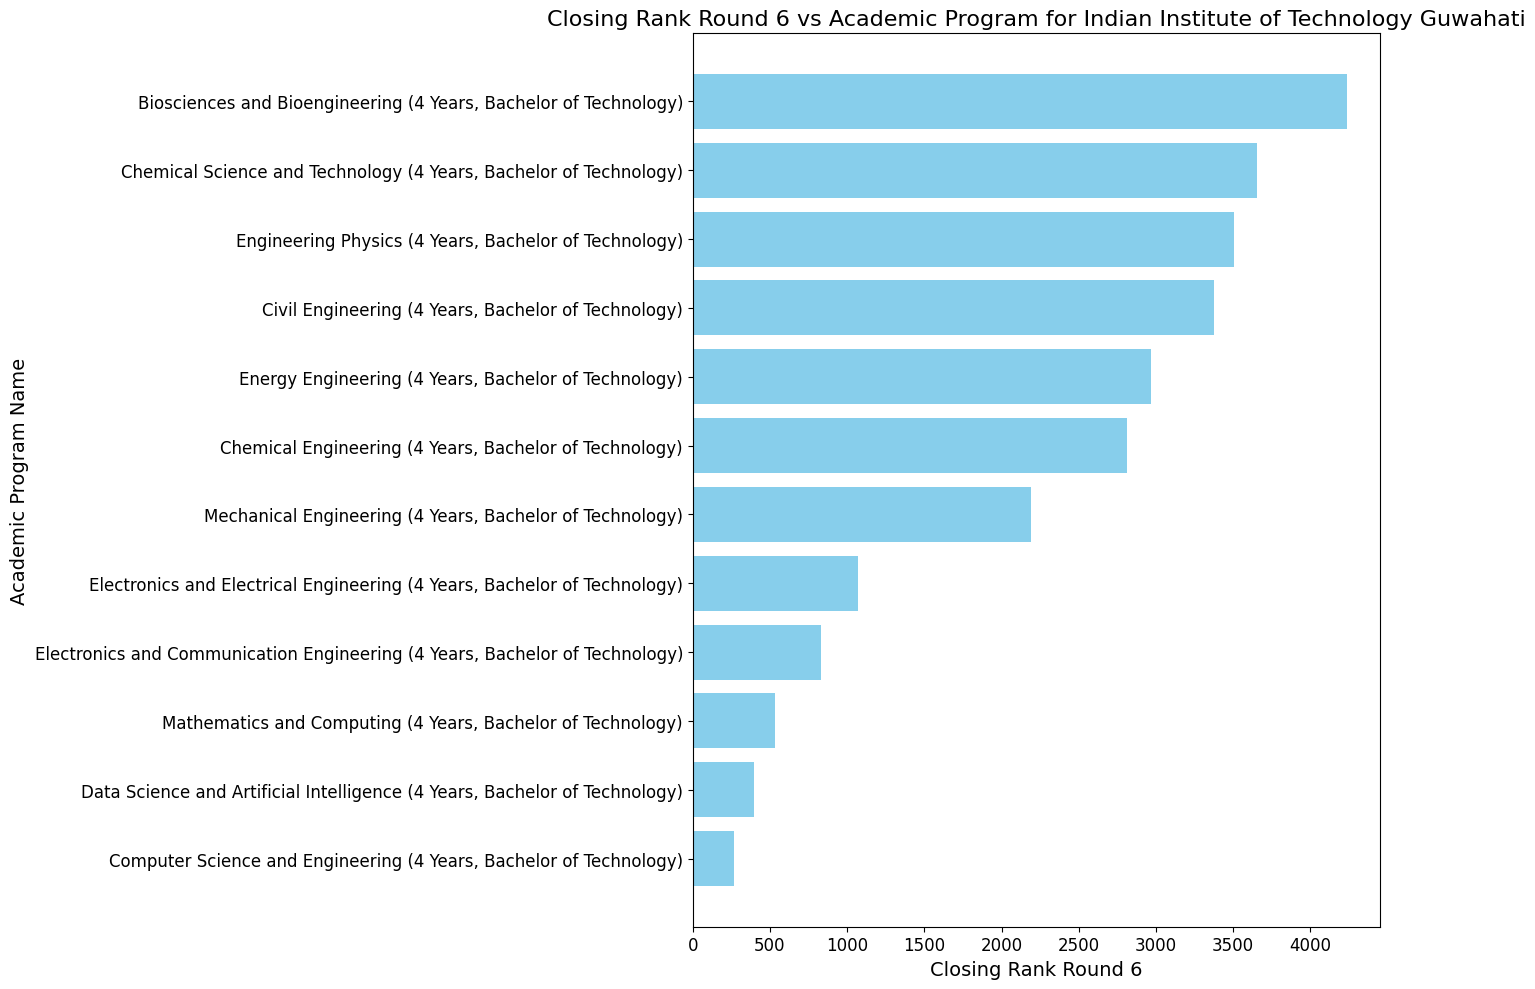

<Figure size 640x480 with 0 Axes>

In [22]:
selected_iit = 'Indian Institute of Technology Guwahati'

filtered_df = iit_df[(iit_df['Institute'] == selected_iit) &
                     (iit_df['Gender'] == 'Gender-Neutral') &
                     (iit_df['Seat Type'] == 'OBC-NCL')]

filtered_df = filtered_df.sort_values('Closing Rank Round 6', ascending=True)

# Plotting
plt.figure(figsize=(14, 10))
plt.barh(filtered_df['Academic Program Name'], filtered_df['Closing Rank Round 6'], color='skyblue')
plt.xlabel('Closing Rank Round 6', fontsize=14)
plt.ylabel('Academic Program Name', fontsize=14)
plt.title(f'Closing Rank Round 6 vs Academic Program for {selected_iit}', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('graph.png', bbox_inches='tight')


In [23]:
iit_specific_df = iit_df[iit_df['Institute'] == 'Indian Institute of Technology Bombay']

In [24]:
import matplotlib.pyplot as plt

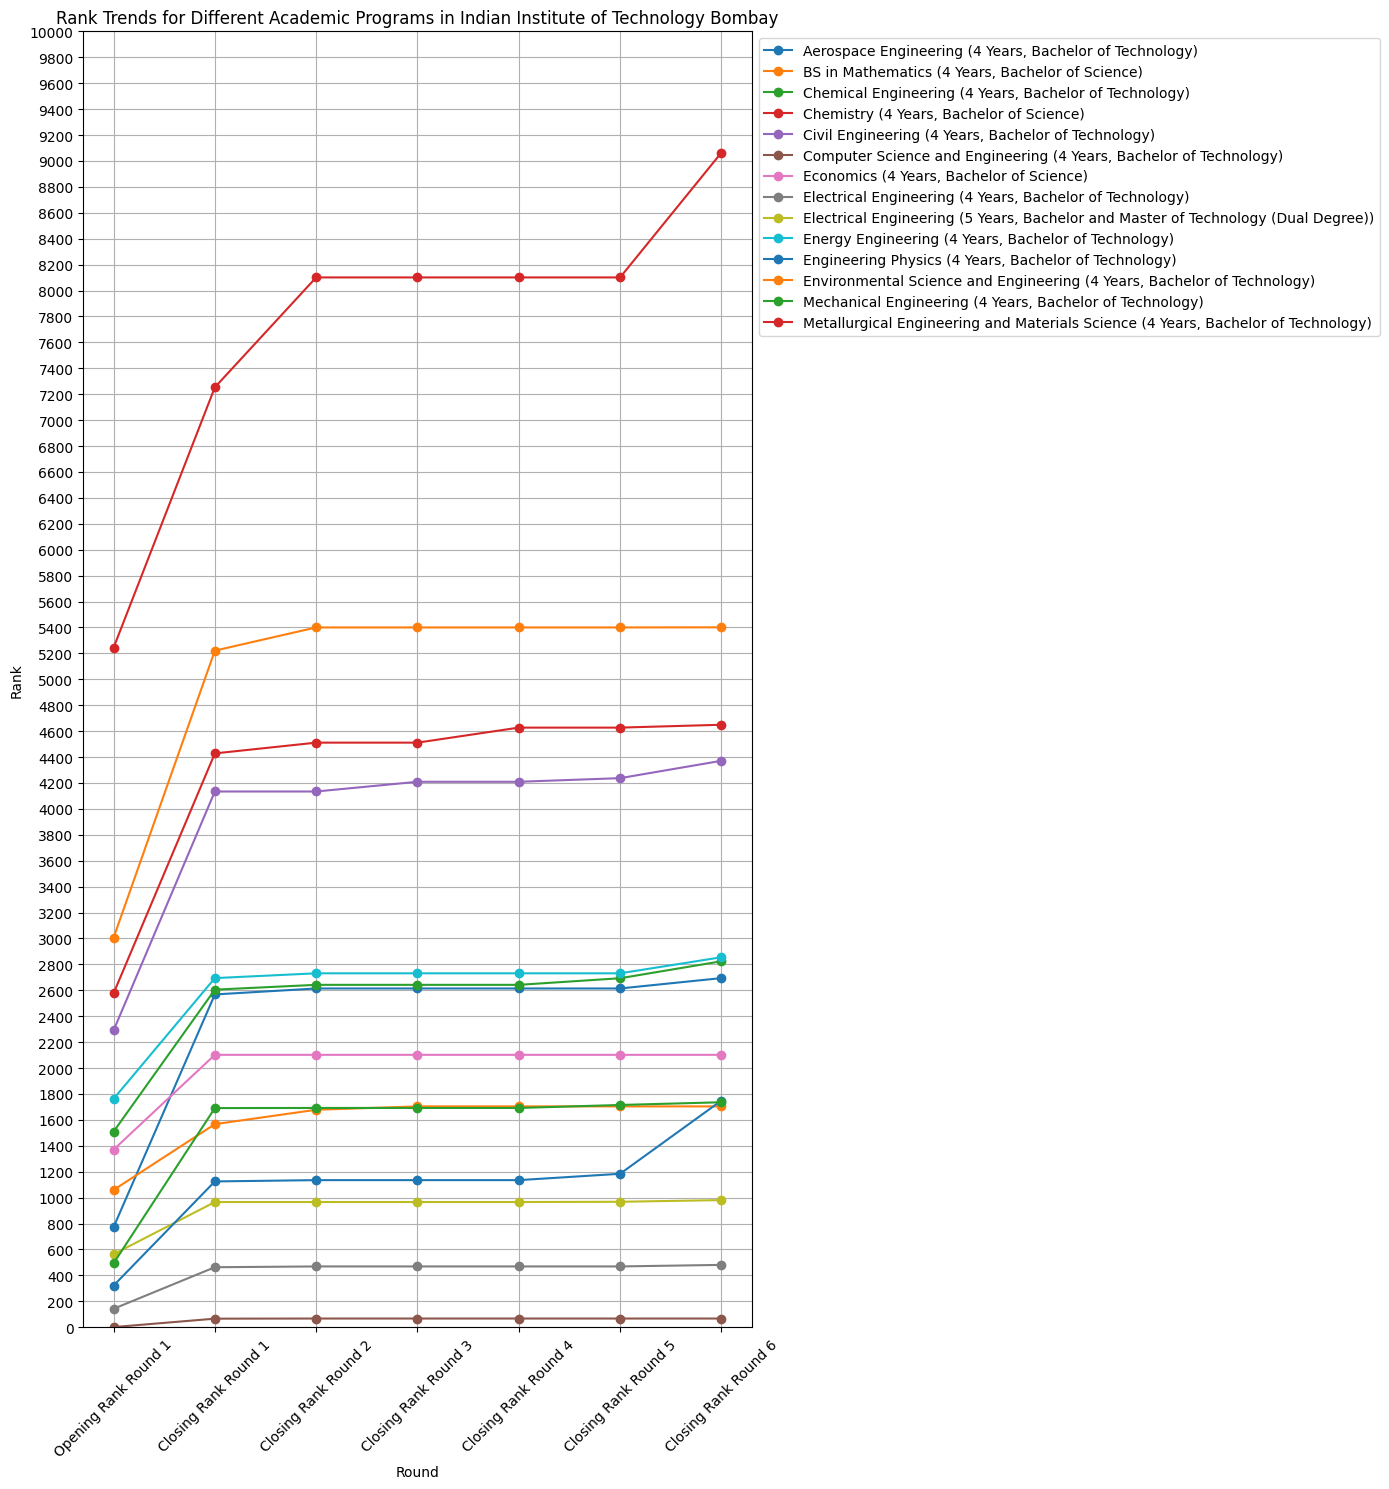

In [25]:
selected_iit = 'Indian Institute of Technology Bombay'


filtered_df = iit_df[(iit_df['Institute'] == selected_iit) &
                     (iit_df['Gender'] == 'Gender-Neutral') &
                     (iit_df['Seat Type'] == 'OPEN') &
                     (iit_df['Quota'] == 'AI')]


melted_df = filtered_df.melt(id_vars=['Institute', 'Academic Program Name'],
                             value_vars=['Opening Rank Round 1', 'Closing Rank Round 1',
                                         'Closing Rank Round 2', 'Closing Rank Round 3',
                                         'Closing Rank Round 4', 'Closing Rank Round 5',
                                         'Closing Rank Round 6'],
                             var_name='Round', value_name='Rank')

melted_df['Round'] = pd.Categorical(melted_df['Round'],
                                    categories=['Opening Rank Round 1', 'Closing Rank Round 1',
                                                'Closing Rank Round 2', 'Closing Rank Round 3',
                                                'Closing Rank Round 4', 'Closing Rank Round 5',
                                                'Closing Rank Round 6'],
                                    ordered=True)

plt.figure(figsize=(14, 15))

for program in melted_df['Academic Program Name'].unique():
    program_df = melted_df[melted_df['Academic Program Name'] == program]
    plt.plot(program_df['Round'], program_df['Rank'], marker='o', label=program)

plt.xlabel('Round')
plt.ylabel('Rank')
plt.title(f'Rank Trends for Different Academic Programs in {selected_iit}')
plt.xticks(rotation=45)

plt.ylim(0, melted_df['Rank'].max() * 1.1)

max_rank = int(melted_df['Rank'].max() * 1.1)
plt.yticks(range(0, max_rank + 200, 200))

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()
plt.show()
